# [Bayesian Core; A Practical Approach to Computational Bayesian Statistics](https://www.amazon.com/Bayesian-Core-Practical-Computational-Statistics/dp/0387389792/ref=sr_1_1?crid=3OW0P55126MXS&keywords=bayesian+core%3A+a+practical+approach&qid=1676495018&s=books&sprefix=bayesian+core+a+practical+approac%2Cstripbooks-intl-ship%2C174&sr=1-1)

In [22]:
import time
import math
import torch
import numpy
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
normal_data_list = [0.02376426, -0.1745652, -0.1985551, -0.01901776, -0.1342334,
-0.1410135, 0.05077826, -0.1029168, -0.1295092, 0.1451396,
-0.0687484, -0.1132299, -0.1786125, -0.07798453, 0.01855422,
0.03572578, -0.03924697, -0.06545234, -0.02904821, -0.1780406,
-0.1591815, -0.1363313, 0.2673065, -0.4287365, -0.1663102,
-0.1632187, -0.05558789, -0.06117982, -0.03999319, -0.03288509,
0.03875265, 0.05344418, -0.04231338, 0.3145072, 0.07888597,
0.0816286, 0.003124024, 0.1035271, -0.2418808, -0.2402874,
-0.0772433, -0.3892236, 0.5866667, -0.03906473, 0.03452478,
-0.06651603, 0.03284966, -0.04588187, 0.1797870, 0.07826228,
-0.03929632, -0.1371275, -0.1632454, 0.02316716, -0.01374885,
-0.1189570, -0.04269577, -0.08076885, -0.006785524, -0.06693,
-0.1243136, -0.1241291, -0.1806283, -0.1069182, -0.06151063,
-0.1093204, 0.04099961, 0.04137659, 0.01877817, 0.01698691,
0.02559012, 0.02795624, -0.09227468, -0.173236, 0.01679687,
0.06004427, 0.03664636, -0.1050247, -0.2950328, -0.1064513,
-0.04460588, -0.008680851, 0.01535210, -0.03432343, -0.1161335,
0.01974065, -0.07071504, 0.1497217, 0.06726551, 0.05786305]
normal_data = numpy.array(normal_data_list)

## A histogram distribution of the data

(-0.6, 0.6)

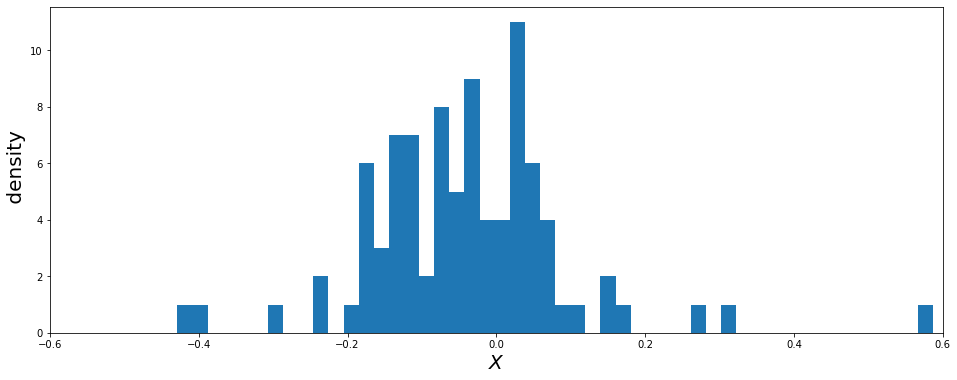

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.hist(normal_data, 50)

ax.set_xlabel("$X$", fontsize = 20)
ax.set_ylabel(" density", fontsize = 20)
ax.set_xlim(-0.6, 0.6)

### Fig.2.4
First, I will try to plot the posterio distribution using a flat prior. Next, I will plot the posterior distritbution using a conjugate prior. Finally, I'll try to use the maximum likelihood (ML) method to estimate the 
distribution of the parameteres of interest. In part ___a___, the flat prior is equal to 1. Then, posterior distributoin is the same as maximising the likelihood. Also, note that we are using the normal dataset so the assumption is that data are ___iid___ and they come from a normal distribution which means they share the same $\mu$ and the same $\sigma^2$. Also, we would like to find the posterior for the mean ($\mu$) of this distribution. 

In [3]:
def normal_likelihood(input_data, mu):
    likelihood_list = []
    n        = input_data.size
    variance = input_data.std()**2
    c1       = (2 * numpy.pi * variance) ** (-0.5 *  n)
    for mu_value in mu:
        # Note that likelihood is a function of mean!
        likelihood = c1 * numpy.exp(((-1/(2*variance)) * ((input_data - mu_value)**2).sum()))
        likelihood_list.append(likelihood)
        
    return numpy.array(likelihood_list)

In [4]:
sample_size            = 100000
mu_range               = numpy.linspace(-0.1, 0.1, sample_size)
normal_data_likelihood = normal_likelihood(normal_data, mu_range)

### Likelihood of the normal data set

Text(0.5, 1.0, 'Likelihood distribution of the normal data set')

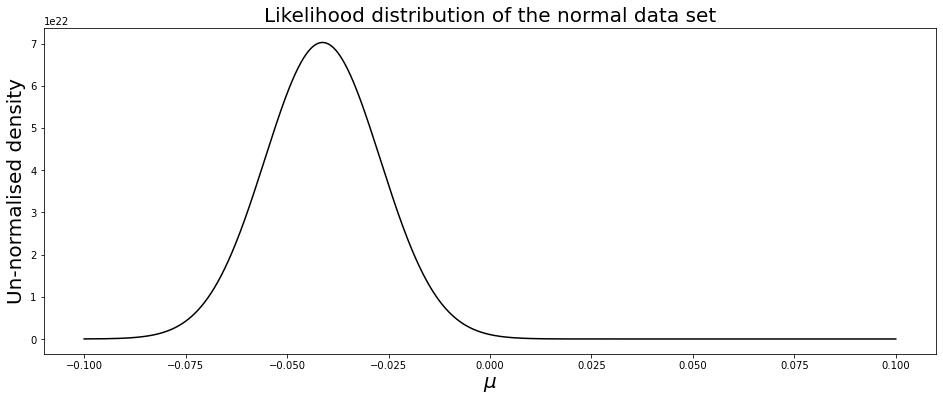

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normal_data_likelihood, 'k-')

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Un-normalised density", fontsize = 20)
ax.set_title("Likelihood distribution of the normal data set", fontsize = 20)

In [6]:
(normal_data_likelihood/normal_data_likelihood.sum()).sum()

0.9999999999999999

### Normalized Jefrrey's prior on $\mu$ 

Here we assume $\mu$ is inside the interval [0.1, 10]. According to eq. 3.38 and the footnote on page 53 of Gregory the Jeffrey's prior will look like the distribution below.

In [7]:
a     = -0.1
b     = 0.1
const = 0.11 #(Setting it exactly to "a" will result in divison by zero!)
jeff_range    = numpy.linspace(a, b, sample_size)
jeffrey_prior = 1/((jeff_range + const) * numpy.log((const + b)/const))

Text(0, 0.5, 'Un-normalised density')

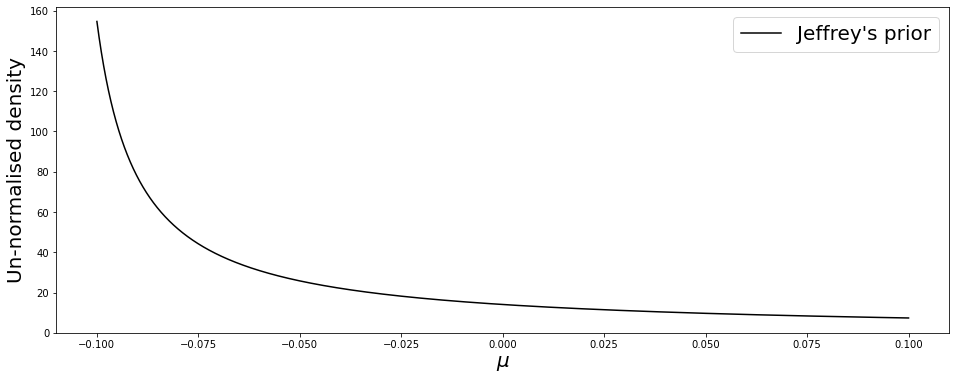

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(jeff_range, jeffrey_prior, 'k-')

ax.legend(["Jeffrey's prior"], fontsize = 20)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Un-normalised density", fontsize = 20)

### Normalized posterior distribution of $\mu$ with Jeffrey's prior $\pi(\mu) = $ [0.1, 10]


In [9]:
normal_data_posterior_jeff = normal_data_likelihood * jeffrey_prior


Text(0.5, 1.0, "Posterior distribution using Jeffrey's prior")

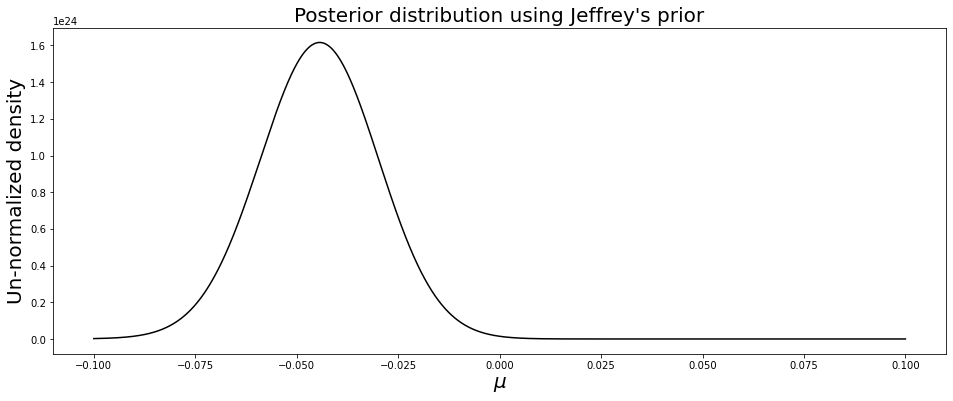

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normal_data_posterior_jeff, 'k-')

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Un-normalized density", fontsize = 20)

ax.set_title("Posterior distribution using Jeffrey's prior", fontsize = 20)

### Checking if posterior adds up to one!

In [11]:
(normal_data_posterior_jeff/normal_data_posterior_jeff.sum()).sum()

0.9999999999999999

### Normalized posterior distribution of $\mu$ with uniform (flat) prior $\pi(\mu) = $ [0.1, 10]

Here, we define uniform (flat) prior $\pi(\mu)$ over the interval [0.1, 10]. In the case, all we need to do is to mulitply the likelihood above by the $\large\frac{1}{b - a}$ where $a = 0.1$ and $b = 10$. See, also, page 48 of Gregory for a quick demonestration that for a prior, e.g. $\pi(\theta)$, to be flat over a given interval, $\large\frac{1}{\Delta\theta}$, then $\pi(\theta) = \large\frac{1}{\Delta\theta}$. 

In [12]:
a = -0.1
b = 0.1
uniform_prior = 1/(b - a)
normal_data_posterior_uniform = normal_likelihood(normal_data, mu_range) * uniform_prior

Text(0.5, 1.0, 'Posterior distribution using uniform (flat) prior')

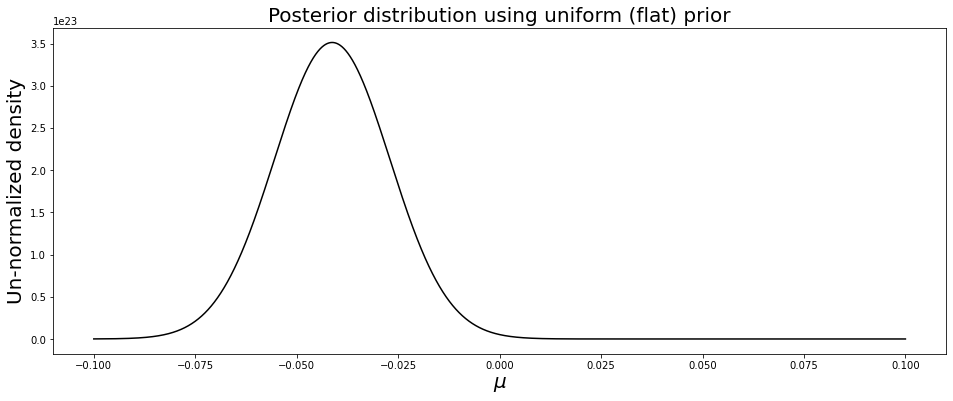

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normal_data_posterior_uniform, 'k-')

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Un-normalized density", fontsize = 20)

ax.set_title("Posterior distribution using uniform (flat) prior", fontsize = 20)

### Checking if posterior adds up to one!

In [14]:
(normal_data_posterior_uniform/normal_data_posterior_uniform.sum()).sum()

0.9999999999999999

### Conjugate normal prior distribution

When both prior and posterior belong to the same family of distributions both the prior and likelihood are called conjugate priors. To this end, we define a normal prior according to the example in the ___bayesian core___ (page 24) with mean zero and variance $0.1 \times \hat{\sigma}^2$ where $\hat{\sigma}$ is the estimated variance of the normal data set. In other words, $\pi(\mu) = N(0, 0.1 \hat{\sigma}^2)$. Note that in scipy the ___scale___ parameter is standard deviation and not variance. So I write $\hat{\sigma}^2$ but in fact in making the normal distribution using scipy.norm.rvs command I do not raise the std to the power of two!

I am not sure above one thing and that is I am genenrating ___$100,000$___ random values from a normal distribution! Is that fine that they are randomly generated and that the distance between the generated random variables is not the same for all of the as opposed to the ___mu_range___ variable that I defined above using the linspace command of the numpy package? I mean if you look at the posterior distribution of the conjugate prior you  can see that at the maximum the distribution is not smooth (the same pattern appears in the comparison plot)! Finally, the conjugate distribution (in both the plot below and in the comparison plot), is slightly different from that of the Fig. 2.4 on page 25 of ___Bayesian core___. Not sure why the distributions are different!

In [37]:
conj_normal_prior = numpy.sort(norm.rvs(0.0, numpy.sqrt(0.1 * normal_data.std()**2), sample_size).astype("float32"))

### Normalized posterior distribution of  𝜇  with conjugate normal prior  $\pi(\mu)=  N(0, 0.1*\hat{\sigma}^2$)

In [39]:
normal_data_posterior_conjugate = normal_likelihood(normal_data, mu_range) * conj_normal_prior
normalised_posterior_conjugate  = normal_data_posterior_conjugate/normal_data_posterior_conjugate.sum()

Text(0.5, 1.0, 'Posterior distribution using conjugate normal prior')

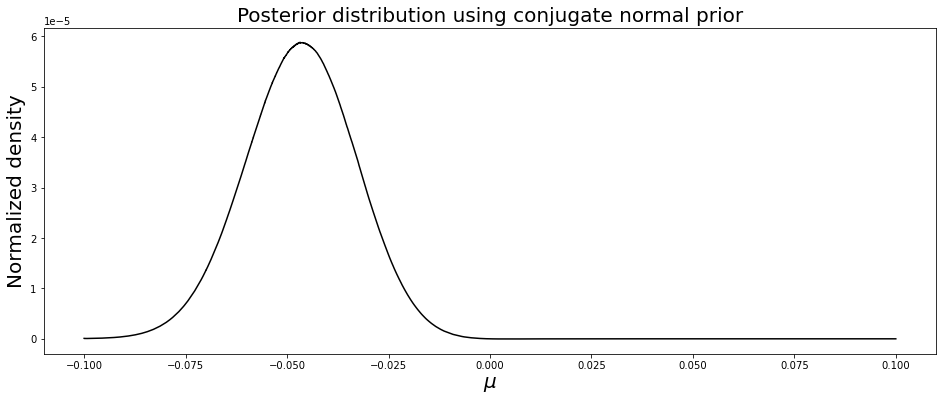

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normalised_posterior_conjugate, 'k-')

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalized density", fontsize = 20)

ax.set_title("Posterior distribution using conjugate normal prior", fontsize = 20)

### Posterior distribution comparison of all four priors

In [19]:
normalised_posterior_jeff    = normal_data_posterior_jeff/normal_data_posterior_jeff.sum()
normalised_posterior_uniform = normal_data_posterior_uniform/normal_data_posterior_uniform.sum()

(-0.1, 0.0)

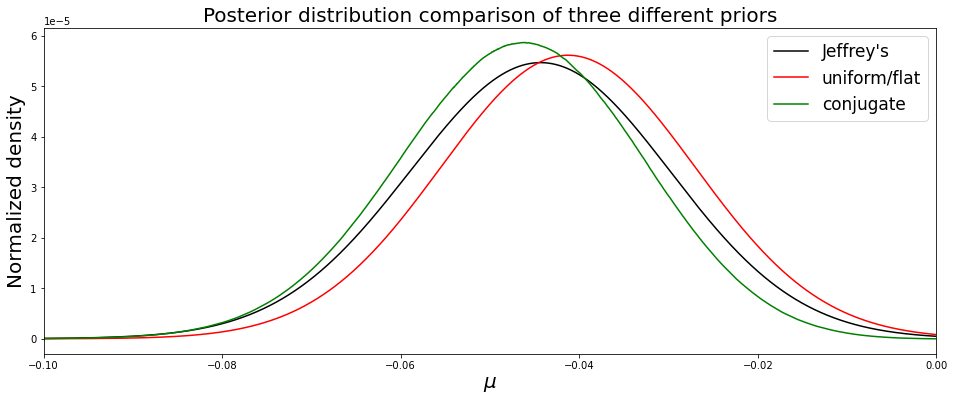

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normalised_posterior_jeff, 'k-')

ax.plot(mu_range, normalised_posterior_uniform, 'r-')

ax.plot(mu_range, normalised_posterior_conjugate, 'g-')


ax.legend(["Jeffrey's", "uniform/flat", "conjugate"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalized density", fontsize = 20)

ax.set_title("Posterior distribution comparison of three different priors", fontsize = 20)

ax.set_xlim(-0.1, 0.0)

## Maximum and curvature of the likelihood

According to Pawitan (page 31), "regular problems are the ones where we can approximate the log-likelihood around the MLE by a ___quadratic function___. For such cases we will also say the likihood function is reqular." Here, we test whether the likelihood distribution of $\mu$ (of the our data set) at the peak can be approximated with a quadratic function! In this problem both $\mu$ and $\sigma^2$ are unknow! To find the likelihood distribution of $\mu$ we use two different methods to comapre the results! First, we apply the ___std___ command of numpy to calculate the standard distribution of the data set. Then, we raise that to the power of two to find the MLE of $\sigma^2$ (i.e. $\hat{\sigma}^2$). Remember, the MLE of $\sigma^2$ (for normal data) is the variance of the data! Once we have $\sigma^2$, we can simply substitute its value into the joint probability distribution of the data set to find the likelihood distribution of $\mu$ (we used this methods in the Bayesian approach above). (See ___normal_likelihood___ function on top of this notebook.) In the second method, we use the likelihood profile and we substitue $\sigma^2$ with its MLE formula in the joint probability distribution of the normal data to get a function that is compeletly based on $\mu$. in other words, we profile likelihood out $\sigma^2$ (see Padiwan pate 62-63). 

## Method one (MLE of $\sigma^2$)

In [383]:
sample_size            = 1000
mu_range               = numpy.linspace(-1, 1, sample_size)
normal_data_likelihood = normal_likelihood(normal_data, mu_range)

var_data               = normal_data.std()**2
# In the line below we find the value of mu_hat (MLE of mu). Where the likelihood distribution of mu is maximum!
# given the sigma = sigma_hat = var(data)
mu_max                 = mu_range[numpy.argmax(normal_data_likelihood)]
mu_max

-0.041041041041041004

### Quadratic approximation of the $L(\mu)$ using method one (code verison one)
In this version of the method one we first take the logarithm of the normal likelihood distribution equation and the we code that (as opposed to version two below where we apply logarithm directly to the likelihood distribution). 

In [386]:
def quadratic_approximation(input_data, mu_range, mu_hat, sigma_hat):
    
    n                          = input_data.size
    log_likeli_mu_hat          = (-0.5 * n) * numpy.log(2 * numpy.pi * sigma_hat) + ((-1/(2*sigma_hat)) * \
                                                    ((input_data - mu_hat) ** 2).sum())

    normalized_log_likeli_list = []
    observed_fisher_list       = []
    for mu_value in mu_range:
        # We apply logarithm to the joint p.d.f. of the normal data
        log_likeli             = (-0.5 * n) * numpy.log(2 * numpy.pi * sigma_hat) + ((-1/(2*sigma_hat)) * \
                                                    ((input_data - mu_value) ** 2).sum())

        normalized_log_likeli  = log_likeli - log_likeli_mu_hat
        
        normalized_log_likeli_list.append(normalized_log_likeli)

        # Evaluating Fisher information at MLE of mu (i.e. mu_hat) according to Pawitan page 32.
        observed_fisher = n/sigma_hat

        # Finally, once we have evaluated Fisher information at mu_hat we can estimate the approximation 
        # according to Pawitan page 32.
        approximation   = -0.5 * observed_fisher * (mu_value - mu_hat)**2
        
        observed_fisher_list.append(approximation)
        
    return numpy.array(normalized_log_likeli_list), numpy.array(observed_fisher_list)


In [387]:
normalized_log_likelihood, quadratic_approx = quadratic_approximation(normal_data, mu_range, mu_max, var_data)

(-2.0, 0.1)

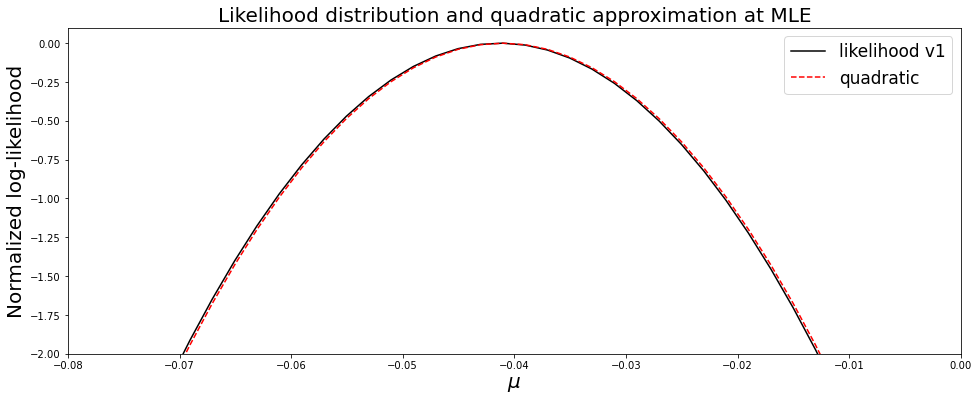

In [397]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normalized_log_likelihood, 'k-')

ax.plot(mu_range, quadratic_approx, 'r--')

ax.legend(["likelihood v1", "quadratic"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalized log-likelihood", fontsize = 20)

ax.set_title("Likelihood distribution and quadratic approximation at MLE", fontsize = 20)

ax.set_xlim(-0.08, 0.0)
ax.set_ylim(-2, 0.1)


### Quadratic approximation of the $L(\mu)$ using method one (code verison two)

In this version of the code I change the input of the function. It takes one more argument (i.e. ___$\mu$_distribution___) and that is the likelihood distribution of the parameter of interest. In this version of the first method the logarithm is applied directly to the likelihood distribution of the parameter of interest interest as popposed to the version above where we coded the analytical equation of the logarithm of the likelihood function for normal distribution. Note that in the code below we add a small positive value ___epsilon___ otherwise the code will complain that "divide by zero encountered in log_likeli"! Also, as a result of adding epsilon, the output will look different from the output of the function above, however, this difference is only over areas where the likelihood of the parameter of interest is zero! Overall, you can leave it or remove it. Either way it will not hurt! 

In [393]:
def quadratic_approximation_v2(input_data, mu_range, mu_distribution, mu_hat, sigma_hat):
    
    n                          = input_data.size
    normalized_log_likeli_list = []
    observed_fisher_list       = []
    epsilon                    = 0.00000001 # can be removed!
    # Below we add a samll positive value otherwise it will complain about log of zero!
    log_likeli            = numpy.log(mu_distribution + epsilon)
    
    # Note the maximum value is taken out of the distribution not "mu_range"
    log_likeli_mu_hat     = numpy.log(mu_distribution.max())
    
    normalized_log_likeli = log_likeli - log_likeli_mu_hat
    
    for mu_value in mu_range:
        # We apply logarithm to the joint p.d.f. of the normal data
        
        # Evaluating Fisher information at MLE of mu (i.e. mu_hat) according to Pawitan page 32.
        observed_fisher = n/sigma_hat

        # Finally, once we have evaluated Fisher information at mu_hat we can estimate the approximation 
        # according to Pawitan page 32.
        approximation   = -0.5 * observed_fisher * (mu_value - mu_hat)**2
        
        observed_fisher_list.append(approximation)

    return normalized_log_likeli, numpy.array(observed_fisher_list)


In [394]:
normalized_log_likelihood_v2, quadratic_approx = quadratic_approximation_v2(normal_data, mu_range, \
                                                                normal_data_likelihood, mu_max, var_data)

(-2.0, 0.1)

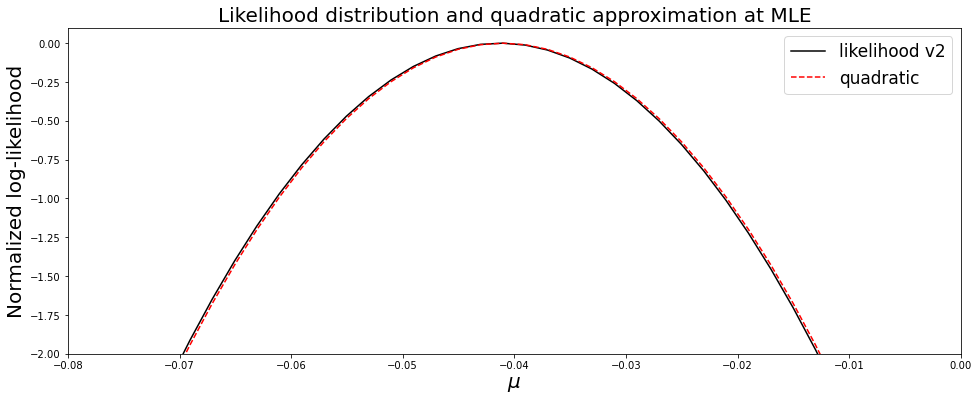

In [398]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normalized_log_likelihood_v2, 'k-')

ax.plot(mu_range, quadratic_approx, 'r--')

ax.legend(["likelihood v2", "quadratic"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalized log-likelihood", fontsize = 20)

ax.set_title("Likelihood distribution and quadratic approximation at MLE", fontsize = 20)

ax.set_xlim(-0.08, 0.0)
ax.set_ylim(-2, 0.1)


## Visualisation of both log-likelihoods

Here we visualise the log-likelihood outputs of both codes to show that they are ___identical___! Note that if you comment out the xlimit (set below) the two outputs will look different but it is because of the fact that in the second version of the code the likelihood is zero in those areas! This can be seen on top of the page in the likelihood distribution plot where likelihood is non-zero within $\sim$ [-0.1, 0.1] and zero outside of it. So that is why we are only interested in the non-zero part and show that both log-likelihoods are the same over this area!

(-2.0, 0.1)

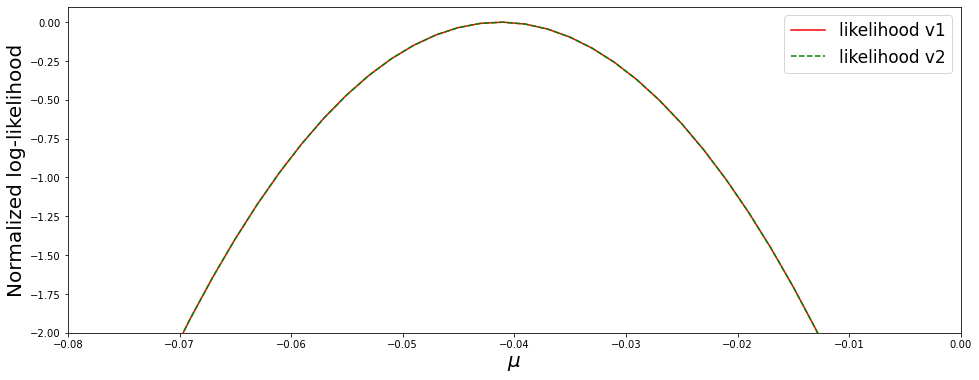

In [405]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normalized_log_likelihood, 'r-')

ax.plot(mu_range, normalized_log_likelihood_v2, 'g--')

ax.legend(["likelihood v1", "likelihood v2"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalized log-likelihood", fontsize = 20)

# ax.set_title("Posterior distribution comparison of three different priors", fontsize = 20)

ax.set_xlim(-0.08, 0.0)
ax.set_ylim(-2, 0.1)


### Quadratic approximation of the $L(\mu)$ (method two) 

In method two, unlike method one, we can make two assumptions about variance, $\sigma^2$. However, either assumption will result in identical profile-lilkelihoods. Assumption one is that $\sigma^2$ is  unknown while in assumption two $\sigma^2$ is known! In assumption one, we can build the profile likelihood of $\sigma^2$ and consider the maximum value of $\sigma^2$ distribution as the MLE of $\sigma^2$ ($\hat{\sigma}^2$). However, to use assumption one we need to use the mean of the data! Next, we use the profile likelihood of $\sigma^2$ is shown below. On the other hand, in assumption two, we could use variance of data set as the MLE of $\sigma^2$ and directly build the profile likelihood of $\mu$. 

Note that profile likelihood method does not need variance! We need variance for quadratic approximation. Since we  are going to use version two of the code above for calculating the log-likelihood and quadratic approximation and since approximation is part of the code I have to provide it with a variance value (bad coding)! So I thought I provide it with variance value that is the result of building the profile likelihood of variance (explained and shown below).

### Assumption one ($\sigma^2$ is unknown)

In [447]:
def sigma_profile_likelihood(input_data, sigma_range):
    
    n          = input_data.size
    constant   = (2 * numpy.pi)**(-0.5*n)
    data_mean  = input_data.mean()
    sigma_list = []
    for sigma_value in sigma_range:
        variable      = (sigma_value**(-0.5*n)) * numpy.exp((-1/(2 * sigma_value)) * \
                                                            ((input_data - data_mean)**2).sum())
        profile_sigma = constant * variable
        
        sigma_list.append(profile_sigma)
                
    return numpy.array(sigma_list)

In [448]:
sample_size          = 1000
sigma_domain         = numpy.linspace(0.0001, 0.2, sample_size)

sigma_profile_likeli = sigma_profile_likelihood(normal_data, sigma_domain)

### A quick note on the degree of freedom

As you can see the shape of the profile likelihood for $\sigma^2$ is close to a normal distribution (though it is not normal). Remember that $\sigma^2$ follows a chi-squared distribution and as the number of degrees of freedom increases the shape of $\sigma^2$ converges to a normal distribution!


(0.01, 0.03)

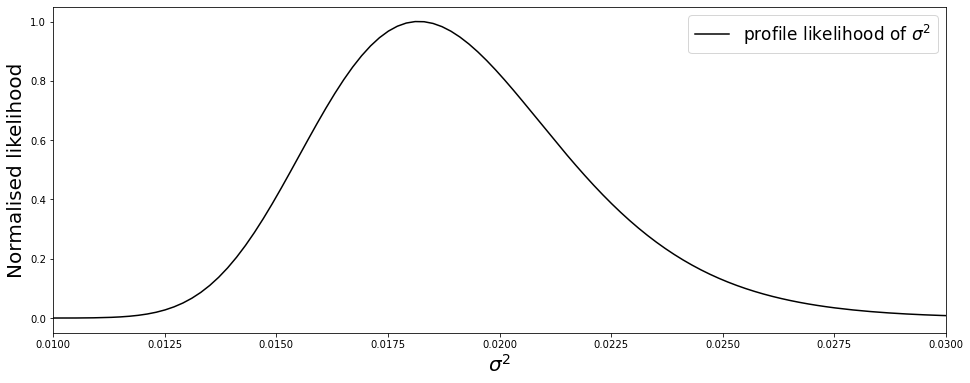

In [449]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(sigma_domain, sigma_profile_likeli/sigma_profile_likeli.max(), 'k-')

ax.legend(["profile likelihood of $\sigma^2$"], fontsize = 17)

ax.set_xlabel(r"$\sigma^2$", fontsize = 20)
ax.set_ylabel("Normalised profile likelihood", fontsize = 20)
ax.set_xlim(0.01, 0.03)

In [439]:
sigma_max = sigma_domain[numpy.argmax(sigma_profile_likeli)]

In [450]:
def mu_profile_likelihood(input_data, mu):
    profile_likelihood_list = []
    n        = input_data.size
    constant = (2 * numpy.pi)**(-0.5 * n) * numpy.exp(-0.5*n)
    for mu_value in mu:
        # Note that likelihood is a function of mean!
        profile_likelihood = ((((input_data - mu_value)**2).sum())/n)**(-0.5*n) * constant
        profile_likelihood_list.append(profile_likelihood)
        
    return numpy.array(profile_likelihood_list)

In [451]:
sample_size       = 1000
mu_range          = numpy.linspace(-1, 1, sample_size)
mu_profile_likeli = mu_profile_likelihood(normal_data, mu_range)

mu_max_profile    = mu_range[numpy.argmax(mu_profile_likeli)]
mu_max_profile

-0.041041041041041004

### Log-likelihood and quadratic approximation (using profile likelihood)

In [452]:
normalized_log_profile_likelihood, _ = quadratic_approximation_v2(normal_data, mu_range, \
                                                                mu_profile_likeli, mu_max_profile, sigma_max)

(-10.0, 0.1)

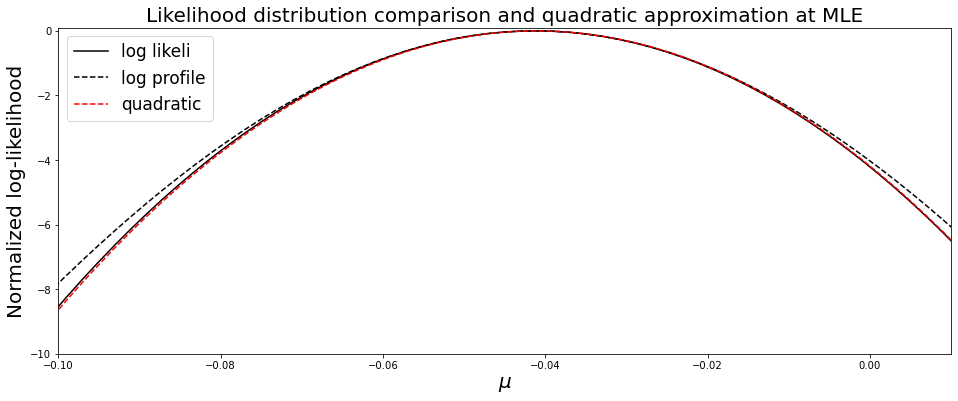

In [453]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normalized_log_likelihood_v2, 'k-')

ax.plot(mu_range, normalized_log_profile_likelihood, 'k--')

ax.plot(mu_range, quadratic_approx, 'r--')


ax.legend(["log likeli", "log profile", "quadratic"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalized log-likelihood", fontsize = 20)

ax.set_title("Likelihood distribution comparison and quadratic approximation at MLE", fontsize = 20)

ax.set_xlim(-0.1, 0.01)
ax.set_ylim(-10, 0.1)


### Assumption two ($\sigma^2$ known)

We assume $\hat{\sigma}^2$ is equal to the variance of the data set!

In [455]:
def mu_profile_likelihood(input_data, mu):
    profile_likelihood_list = []
    n        = input_data.size
    constant = (2 * numpy.pi)**(-0.5 * n) * numpy.exp(-0.5*n)
    for mu_value in mu:
        # Note that likelihood is a function of mean!
        profile_likelihood = ((((input_data - mu_value)**2).sum())/n)**(-0.5*n) * constant
        profile_likelihood_list.append(profile_likelihood)
        
    return numpy.array(profile_likelihood_list)

In [361]:
sample_size       = 1000
mu_range          = numpy.linspace(-1, 1, sample_size)
mu_profile_likeli = mu_profile_likelihood(normal_data, mu_range)

mu_max_profile    = mu_range[numpy.argmax(mu_profile_likeli)]
mu_max_profile

-0.041041041041041004

In [456]:
normalized_log_profile_likelihood, _ = quadratic_approximation_v2(normal_data, mu_range, mu_profile_likeli, \
                                                                  mu_max_profile, normal_data.std()**2)

(-10.0, 0.1)

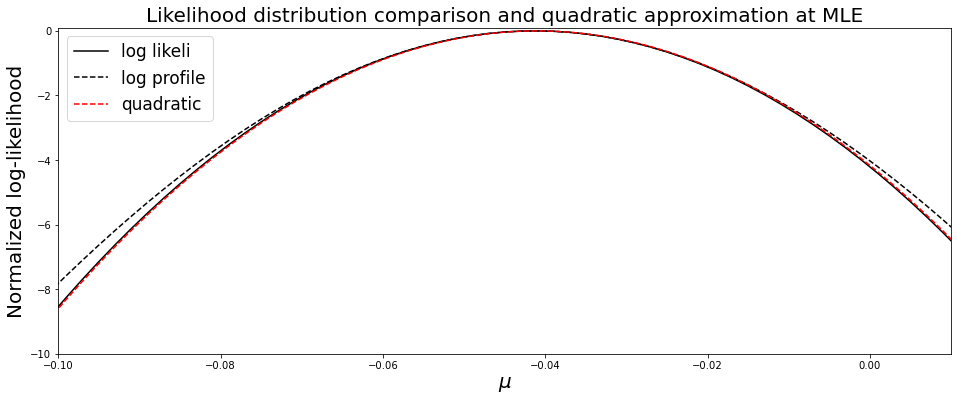

In [457]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normalized_log_likelihood_v2, 'k-')

ax.plot(mu_range, normalized_log_profile_likelihood, 'k--')

ax.plot(mu_range, quadratic_approx, 'r--')


ax.legend(["log likeli", "log profile", "quadratic"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalized log-likelihood", fontsize = 20)

ax.set_title("Likelihood distribution comparison and quadratic approximation at MLE", fontsize = 20)

ax.set_xlim(-0.1, 0.01)
ax.set_ylim(-10, 0.1)


### Comparison of profile likelihood and likelihood (for $\mu$)

Note that here we just want to compare the two likelihoods not the log ratio of them! Note that we found the profile likelihood of $\mu$ without using $\sigma^2$ (or $\large\hat{\sigma}^2$). In other words, we marginalised over sigma while to find likelihood distribution (as was done on top of this notebook) we used the MLE of sigma (i.e. variance of data)! However, they both match perfectly!

(-0.1, 0.01)

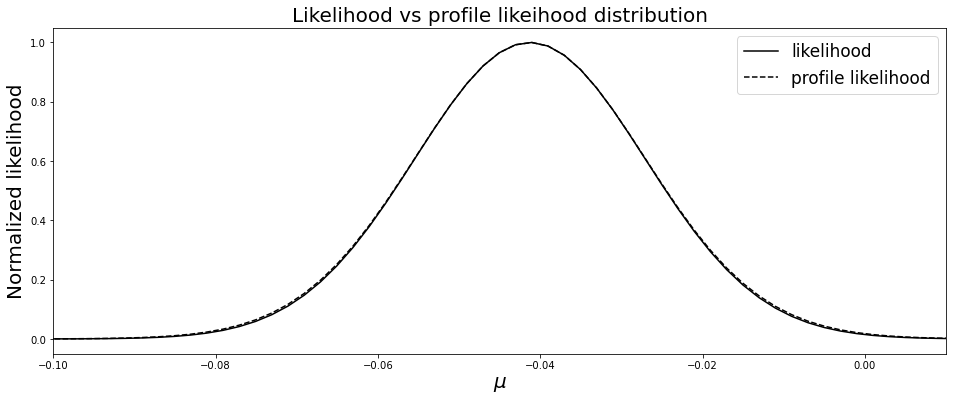

In [469]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normal_data_likelihood/normal_data_likelihood.max(), 'k-')

ax.plot(mu_range, mu_profile_likeli/mu_profile_likeli.max(), 'k--')

ax.legend(["likelihood", "profile likelihood"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)

ax.set_ylabel("Normalized likelihood", fontsize = 20)

ax.set_title("Likelihood vs profile likeihood distribution", fontsize = 20)

ax.set_xlim(-0.1, 0.01)
# ax.set_ylim(-10, 0.1)
